In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../data/cookie_cats.csv")

In [4]:
# Segmentasyon ( 02_feature_ideas.ipynb' içinden alındı)
data['player_segment'] = pd.cut(data['sum_gamerounds'],
                               bins=[0, 20, 100, data['sum_gamerounds'].max()],
                               labels=['casual', 'mid', 'core'])

# Segment bazlı retention ortalamaları
seg_ret1 = data.groupby('player_segment', observed=True)['retention_1'].mean()
seg_ret7 = data.groupby('player_segment', observed=True)['retention_7'].mean()

print("Segment Retention 1-day:\n", seg_ret1)
print("Segment Retention 7-day:\n", seg_ret7)

Segment Retention 1-day:
 player_segment
casual    0.204113
mid       0.698914
core      0.899879
Name: retention_1, dtype: float64
Segment Retention 7-day:
 player_segment
casual    0.032964
mid       0.228912
core      0.713121
Name: retention_7, dtype: float64


In [7]:
# generate_benchmark_csv.py dosyası ile random ürettiğimiz puzzle_games_benchmark.csv

try:
    benchmark = pd.read_csv("../data/puzzle_games_benchmark.csv")
    print(benchmark.head())
except:
    print("Benchmark dataset bulunamadı, placeholder veriler kullanılacak.")

                   game publisher  retention_1  retention_7
0              Township   StudioA     0.430905     0.151396
1          Block Blast!   StudioB     0.863036     0.087754
2         Gossip Harbor   StudioC     0.698995     0.613014
3           Magic Sort!   StudioD     0.598994     0.440725
4  Word Search Explorer   StudioE     0.267014     0.510247


### Görselleştirme

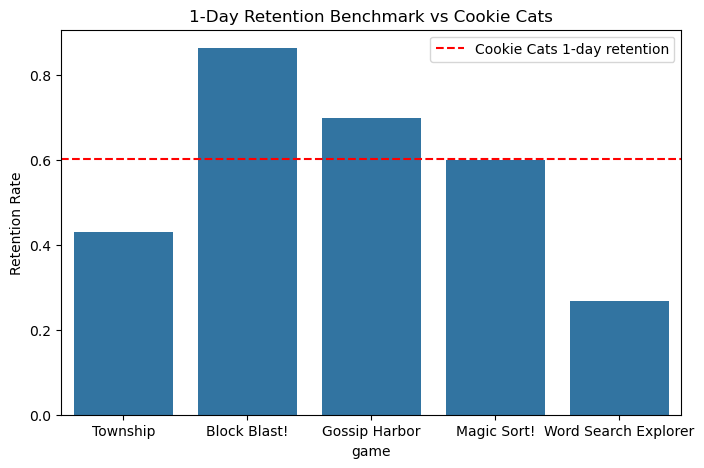

In [11]:
# 1-Day Retention Benchmark vs Cookie Cats

plt.figure(figsize=(8,5))
sns.barplot(x='game', y='retention_1', data=benchmark)
plt.axhline(seg_ret1.mean(), color='red', linestyle='--', label='Cookie Cats 1-day retention')
plt.title("1-Day Retention Benchmark vs Cookie Cats")
plt.ylabel("Retention Rate")
plt.legend()
plt.show()


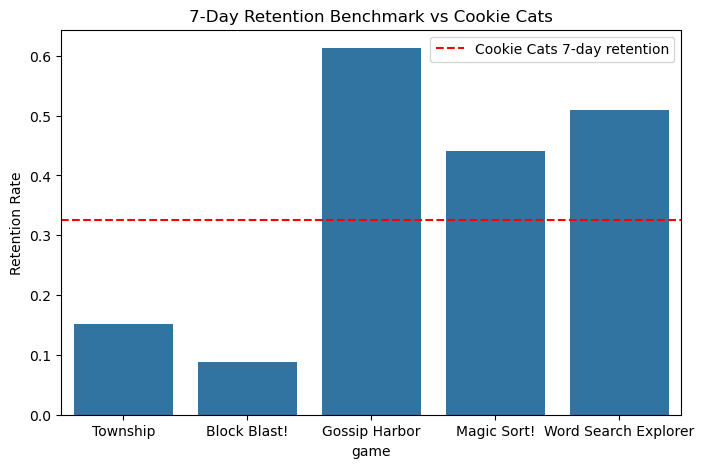

In [12]:
# 7-Day Retention Benchmark vs Cookie Cats

plt.figure(figsize=(8,5))
sns.barplot(x='game', y='retention_7', data=benchmark)
plt.axhline(seg_ret7.mean(), color='red', linestyle='--', label='Cookie Cats 7-day retention')
plt.title("7-Day Retention Benchmark vs Cookie Cats")
plt.ylabel("Retention Rate")
plt.legend()
plt.show()

### Özet

In [14]:
# Segment bazlı Cookie Cats retention
print("Cookie Cats 1-day retention segment ortalamaları:\n", seg_ret1)
print("Cookie Cats 7-day retention segment ortalamaları:\n", seg_ret7)

# Benchmark ile karşılaştırma
benchmark_avg_1d = benchmark['retention_1'].mean()
benchmark_avg_7d = benchmark['retention_7'].mean()
cookiecats_1d = seg_ret1.mean()
cookiecats_7d = seg_ret7.mean()

print(f"Benchmark 1-day retention ortalaması: {benchmark_avg_1d:.3f}")
print(f"Cookie Cats 1-day retention ortalaması: {cookiecats_1d:.3f}")

print(f"Benchmark 7-day retention ortalaması: {benchmark_avg_7d:.3f}")
print(f"Cookie Cats 7-day retention ortalaması: {cookiecats_7d:.3f}")

Cookie Cats 1-day retention segment ortalamaları:
 player_segment
casual    0.204113
mid       0.698914
core      0.899879
Name: retention_1, dtype: float64
Cookie Cats 7-day retention segment ortalamaları:
 player_segment
casual    0.032964
mid       0.228912
core      0.713121
Name: retention_7, dtype: float64
Benchmark 1-day retention ortalaması: 0.572
Cookie Cats 1-day retention ortalaması: 0.601
Benchmark 7-day retention ortalaması: 0.361
Cookie Cats 7-day retention ortalaması: 0.325


In [15]:
# Yorum
if cookiecats_1d < benchmark_avg_1d:
    print("Cookie Cats 1-day retention benchmark ortalamasının altında. Casual oyuncular için onboarding ve günlük bonus öneriliyor.")
else:
    print("Cookie Cats 1-day retention benchmark ortalamasına göre iyi durumda.")

if cookiecats_7d < benchmark_avg_7d:
    print("Cookie Cats 7-day retention benchmark ortalamasının altında. Orta ve casual segmentlere odaklanılmalı.")
else:
    print("Cookie Cats 7-day retention benchmark ortalamasına göre iyi durumda.")

Cookie Cats 1-day retention benchmark ortalamasına göre iyi durumda.
Cookie Cats 7-day retention benchmark ortalamasının altında. Orta ve casual segmentlere odaklanılmalı.
